Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

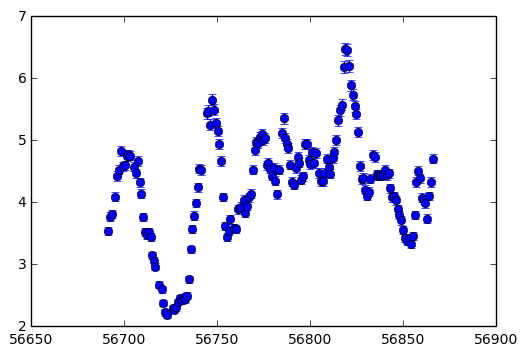

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm
from scipy.optimize import curve_fit
import numpy.fft

ref_file="lc/1367A.lc"
echo_file="lc/4775A.lc"

dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqL




array([ 0.005     ,  0.01861938,  0.04473305,  0.06933623,  0.10747115,
        0.16658029,  0.25819945,  0.40020915,  0.62032418])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

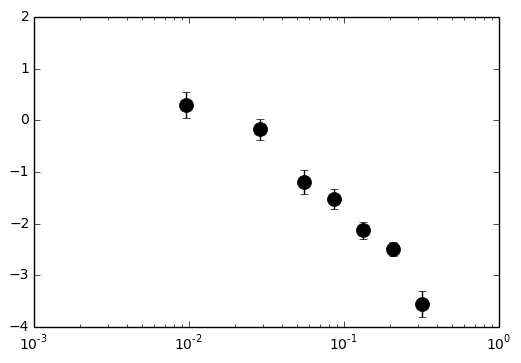

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

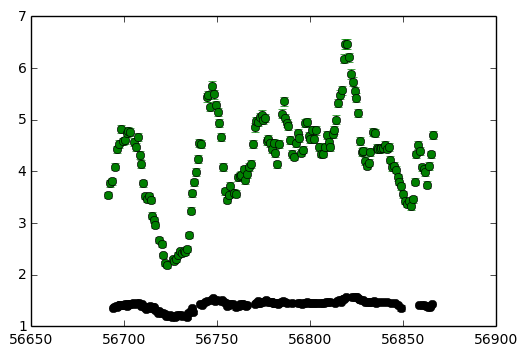

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.348e-01 6.523e+01 inf -- -3.028e+02 -- 1 1 1 1 1 1 1 1
   2 7.699e-01 6.427e+01 8.100e+01 -- -2.218e+02 -- 0.580653 0.565804 0.565201 0.565214 0.565618 0.565947 0.565564 0.568603
   3 3.354e+00 6.351e+01 8.006e+01 -- -1.417e+02 -- 0.182695 0.132486 0.130058 0.130216 0.131744 0.132399 0.131339 0.138486
   4 1.556e+00 6.272e+01 7.903e+01 -- -6.268e+01 -- -0.16907 -0.296462 -0.306097 -0.304877 -0.301753 -0.300835 -0.302915 -0.292641
   5 5.969e-01 6.132e+01 7.726e+01 -- 1.458e+01 -- -0.432204 -0.709149 -0.744405 -0.7396 -0.734995 -0.733546 -0.736839 -0.725614
   6 3.744e-01 5.885e+01 7.418e+01 -- 8.877e+01 -- -0.574318 -1.06985 -1.18591 -1.17296 -1.16819 -1.16502 -1.16974 -1.15872
   7 2.704e-01 5.526e+01 6.977e+01 -- 1.585e+02 -- -0.632315 -1.30174 -1.62986 -1.60311 -1.60167 -1.59376 -1.60104 -1.58978
   8 2.118e-01 5.083e+01 6.476e+01 -- 2.233e+02 -- -0.652594 -1.36692 -2.06821 -2.02717 -2.03482 -2.01697 -2.03052 -2.01815
   9 1.754e-01 4.545e+01 5.869e+01 -- 2.820e+02 -- -0.6363

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 4.048e+02 4.043e+02 -5.351e-01 -3.037e-01 0.864 +++
+++ 4.048e+02 4.039e+02 -5.351e-01 -1.881e-01 1.82 +++
+++ 4.048e+02 4.041e+02 -5.351e-01 -2.459e-01 1.3 +++
+++ 4.048e+02 4.042e+02 -5.351e-01 -2.748e-01 1.07 +++
+++ 4.048e+02 4.043e+02 -5.351e-01 -2.893e-01 0.967 +++
+++ 4.048e+02 4.043e+02 -5.351e-01 -2.821e-01 1.02 +++
+++ 4.048e+02 4.043e+02 -5.351e-01 -2.857e-01 0.993 +++
	### errors for param 1 ###
+++ 4.048e+02 4.043e+02 -1.441e+00 -1.235e+00 0.928 +++
+++ 4.048e+02 4.038e+02 -1.441e+00 -1.132e+00 1.97 +++
+++ 4.048e+02 4.041e+02 -1.441e+00 -1.183e+00 1.41 +++
+++ 4.048e+02 4.042e+02 -1.441e+00 -1.209e+00 1.16 +++
+++ 4.048e+02 4.043e+02 -1.441e+00 -1.222e+00 1.04 +++
+++ 4.048e+02 4.043e+02 -1.441e+00 -1.229e+00 0.983 +++
+++ 4.048e+02 4.043e+02 -1.441e+00 -1.225e+00 1.01 +++
+++ 4.048e+02 4.043e+02 -1.441e+00 -1.227e+00 0.997 +++
	### errors for param 2 ###
+++ 4.048e+02 4.046e+02 -2.714e+00 -2.585e+00 0.296 +++
+++ 4.048e+02 4.045e+02 -2.714

<Container object of 3 artists>

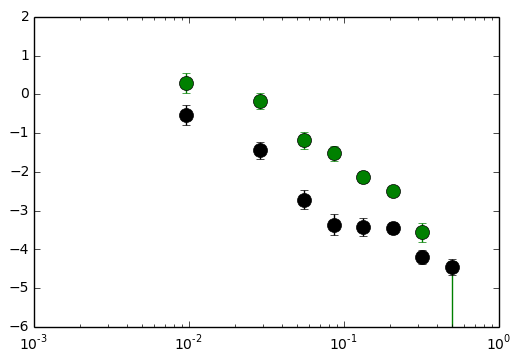

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 1.165e+02 1.119e+01 inf -- 4.615e+02 -- -0.417232 -1.10978 -2.25224 -2.74174 -3.07438 -3.26634 -4.18046 -6.52588 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 7.488e+01 1.326e+01 2.469e+00 -- 4.640e+02 -- -0.379546 -1.07024 -2.2349 -2.70308 -3.05386 -3.26052 -4.19422 -6.22588 0.0594438 0.143922 0.211494 0.183563 0.124903 0.187977 0.0382351 -1.06488
   5 3.958e+01 1.546e+01 2.253e+00 -- 4.663e+02 -- -0.347917 -1.03742 -2.21505 -2.66882 -3.03593 -3.25222 -4.20507 -5.92588 0.0292929 0.176748 0.302165 0.24639 0.145443 0.263839 -0.0201518 0.625425
   7 2.952e+01 1.780e+01 1.997e+00 -- 4.683e+02 -- -0.321166 -1.00987 -2.19485 -2.63901 -3.02019 -3.2426 -4.21334 -5.62588 0.00616037 0.202118 0.375333 0.294616 0.162597 0.328567 -0.0750795 -1.84997
   9 3.498e+01 2.030e+01 1.927e+00 -- 4.702e+02 -- -0.298358 -0.986546 -2.1755 -2.61326 -3.00636 -3.23255 -4.21943 -5.92588 -0.0120242 0.222305 0.43445 0.33256 0.177047 0.383459 -0.125124 0.240961
  11 2.323e+01 2.295e+01 1.750e+00 -- 4.719e+02 -- -0.27879

In [12]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

array([-1.75428512,  1.89869772,  2.40546134,  0.87877231,  0.11177487,
        0.53410247, -0.29118093,  0.03088965])

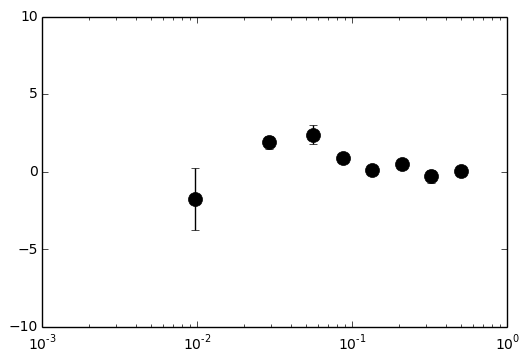

In [13]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")

lag

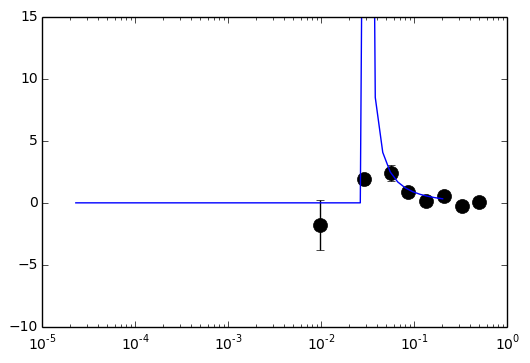

In [14]:
s, loc, scale = lognorm.fit(lag,loc=.008)

xscale('log'); ylim(-10,15)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")
plot(np.logspace(np.log(fqd[0]),np.log(fqd[-1])),lognorm.pdf(np.logspace(np.log(fqd[0]),np.log(fqd[-1])),s,loc,scale))








(0.47677903915219444, 1.214804919002201)

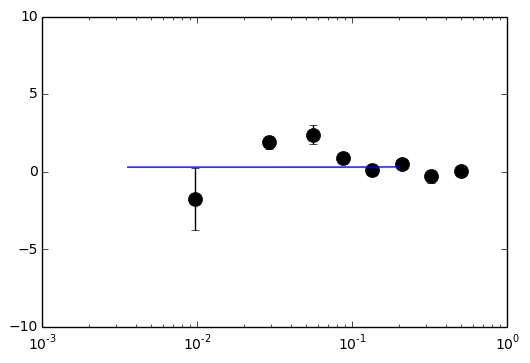

In [15]:
loc, scale = norm.fit(lag,loc=.01)

xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")
plot(np.logspace(np.log(fqd[3]),np.log(fqd[-1])),norm.pdf(np.logspace(np.log(fqd[0]),np.log(fqd[-1])),loc,scale))

norm.fit(lag,loc=.01,scale=.1)

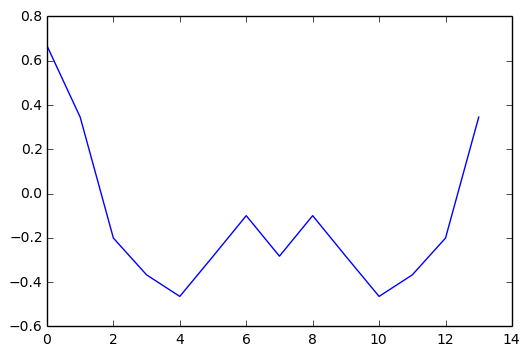

In [16]:
plot(irfft(lag))